#### Credit Card Churn Prediction in Banking 

* Data from kaggle : https://www.kaggle.com/sakshigoyal7/credit-card-customers 
* Credit card service
* BankChurn
* CASE : A manager at the bank is disturbed with more and more customers leaving their credit card services. They would    really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction 




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

import sklearn.model_selection as ms 
import sklearn.linear_model as lm 
import sklearn.ensemble as ens 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.tree as tree 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import sklearn.metrics as met
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report

import sklearn.feature_selection as fs 
import shap

#### Load Dataset 

In [2]:
churn = pd.read_csv(
    r"I:\My Prof\Digital School\Dataset & Modelling\BankChurners.csv\BankChurners.csv"
   ) #importing dataset
churn = churn.drop(
    ["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
     "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],
    axis = 1) #drop 2 last columns  
churn 

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


#### Data Exploration 

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
churn.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [5]:
churn.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10122    False
10123    False
10124    False
10125    False
10126    False
Length: 10127, dtype: bool

In [6]:
churn.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


#### Data Visualisation 
* Attrition Flag 
* Customer Age 
* Dependent count 
* Education level 
* Gender 
* Income Category 
* Months Inactive 12 month 
* Marital Status 
* Months on book 
* Total Revolving Bal 
* Total Transt Ct 

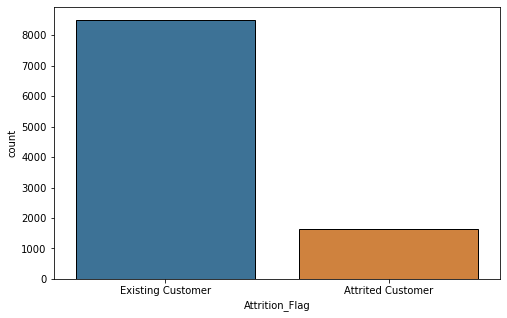

In [7]:
# show chart Internal Activities, attrited customer (1) and existing customer (0) 

plt.figure(figsize = (8,5))
sns.countplot(x = churn['Attrition_Flag'], edgecolor = 'black', saturation = 0.60)
plt.show()


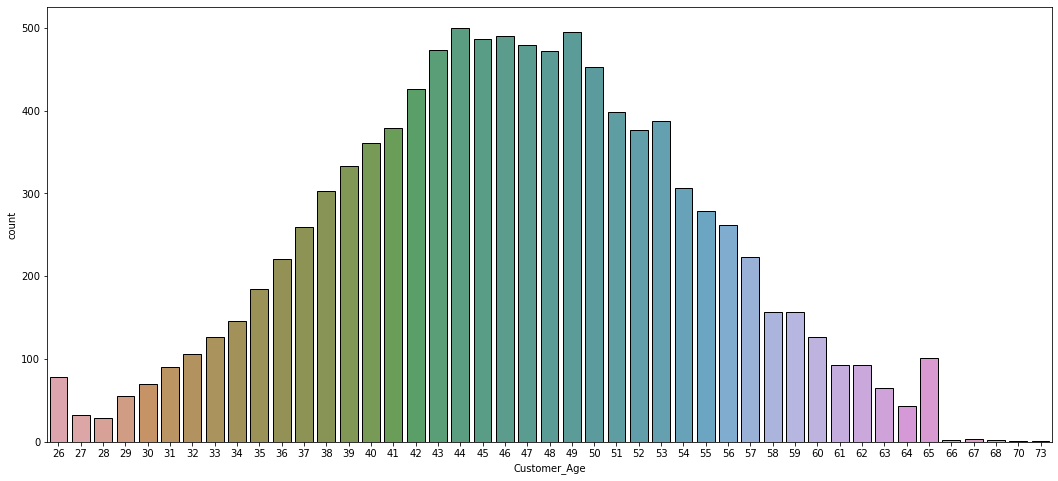

In [8]:
# show chart customer age 

plt.figure(figsize = (18,8))
sns.countplot(x = churn['Customer_Age'], edgecolor = 'black', saturation = 0.50)
plt.show()


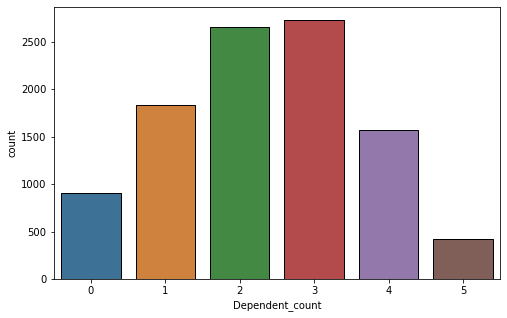

In [9]:
# show chart Dependent count, jumlah tanggungan  

plt.figure(figsize = (8,5))
sns.countplot(x = churn['Dependent_count'], edgecolor = 'black', saturation = 0.60)
plt.show()


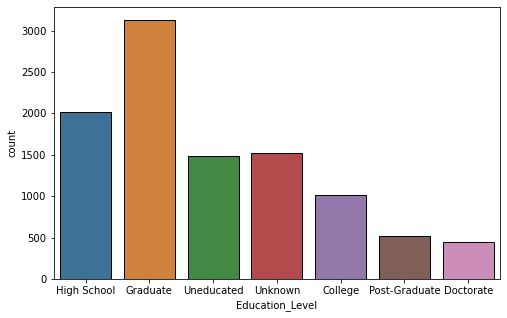

In [10]:
# show chart education level 

plt.figure(figsize = (8,5))
sns.countplot(x= churn['Education_Level'], edgecolor = 'black', saturation = 0.60)
plt.show()



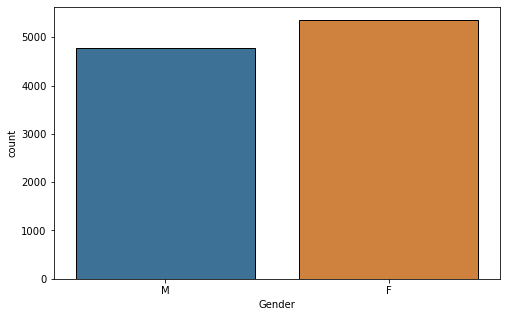

In [11]:
# show chart gender in credit card 

plt.figure(figsize = (8,5))
sns.countplot(x = churn['Gender'], edgecolor = 'black', saturation = 0.60)
plt.show()


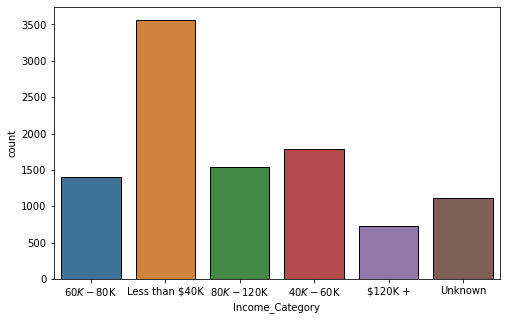

In [12]:
# show chart income_category 

plt.figure(figsize = (8,5))
sns.countplot(x = churn['Income_Category'], edgecolor = 'black', saturation = 0.60)
plt.show()


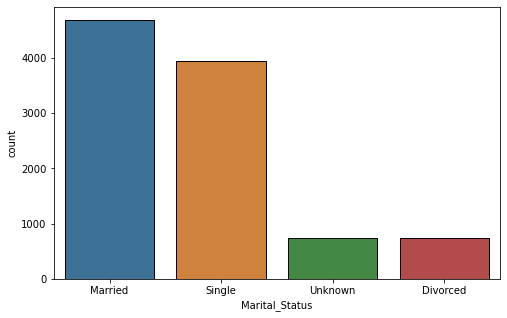

In [13]:
# show chart Marital status 

plt.figure(figsize = (8,5))
sns.countplot(x = churn['Marital_Status'], edgecolor = 'black', saturation = 0.60)
plt.show()



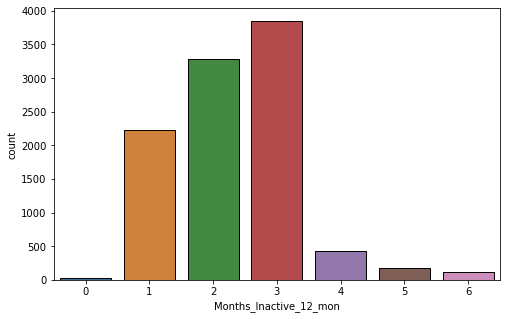

In [14]:
# show chart their activity in month 

plt.figure(figsize = (8,5))
sns.countplot(x = churn['Months_Inactive_12_mon'], edgecolor = 'black', saturation = 0.60)
plt.show()


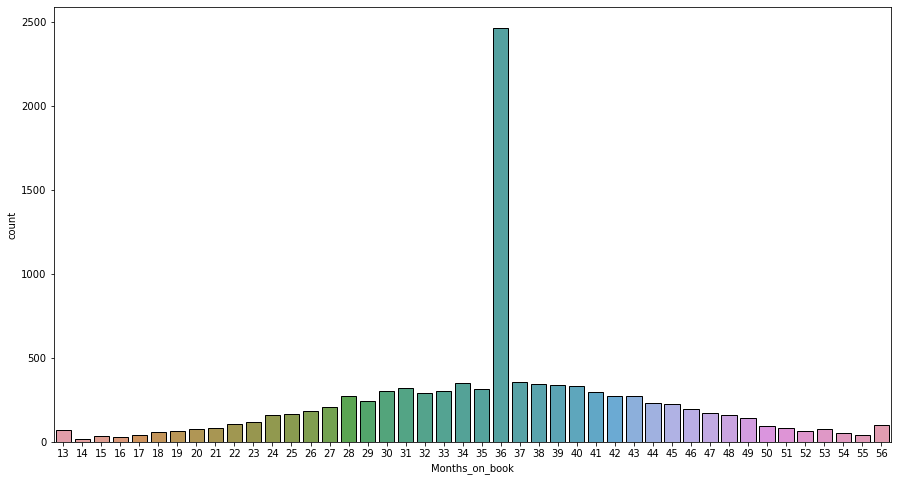

In [15]:
# show chart Months book in banking 

plt.figure(figsize = (15,8))
sns.countplot(x = churn['Months_on_book'], edgecolor = 'black', saturation = 0.60)
plt.show()


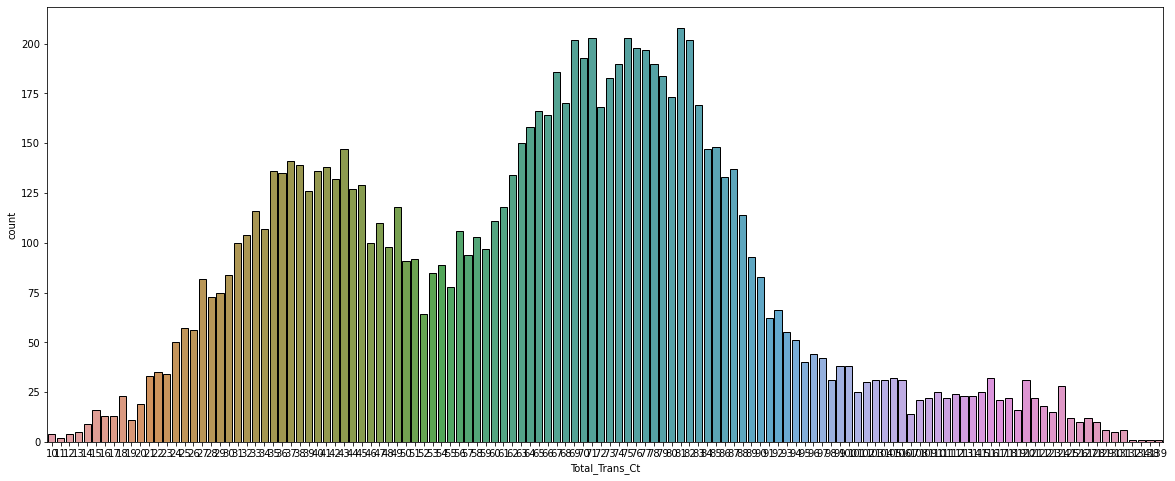

In [16]:
# show chart Total transaction in banking 

plt.figure(figsize = (20,8))
sns.countplot(x = churn['Total_Trans_Ct'], edgecolor = 'black', saturation = 0.60)
plt.show()


#### Feature Engineering 

In [17]:
churn.Attrition_Flag.replace({'Existing Customer': 0,
                              'Attrited Customer': 1}, 
                              inplace=True)

churn.Gender.replace({'F': 0, 
                      'M': 1}, 
                      inplace=True)

churn.Education_Level.replace({'Uneducated':0,
                               'High School': 1, 
                               'College': 2, 
                               'Graduate':3,
                               'Post-Graduate':4,
                               'Doctorate':5,
                               'Unknown': 6},
                                inplace=True )

churn.Marital_Status.replace({'Single': 0,
                              'Married': 1,
                              'Divorced':2, 
                              'Unknown':3},
                              inplace=True)

churn.Income_Category.replace({'Less than $40K': 1,
                               '$80K - $120K': 4,
                               '$60K - $80K': 3,
                               'Unknown':0},
                               inplace=True)
churn.Income_Category.replace({'$40K - $60K': 2},
                               inplace=True)
churn.Income_Category.replace({'$120K +': 5},
                               inplace=True)

churn.Card_Category. replace ({'Blue' : 0,
                               'Silver' : 1, 
                               'Gold' : 2, 
                               'Platinum' : 3}, 
                               inplace = True)


churn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,1,3,1,1,3,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,3,0,1,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,3,3,1,4,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,0,4,1,3,1,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,1,3,0,1,3,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [18]:
churn["Total_Revolving_Bal/Avg"] = churn["Total_Revolving_Bal"]/np.average(churn["Total_Revolving_Bal"])
churn["Months_on_book/avg"] = churn["Months_on_book"]/np.average(churn["Months_on_book"])
churn["Dependen_count/avg"] = churn["Dependent_count"]/np.average(churn["Dependent_count"])
churn["Months_Inactive_12_mon/avg"]= churn["Months_Inactive_12_mon"]/np.average(churn["Months_Inactive_12_mon"])
churn["Total_Trans_Ct/avg"] = churn ["Total_Trans_Ct"]/np.average(churn["Total_Trans_Ct"])
churn 

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Revolving_Bal/Avg,Months_on_book/avg,Dependen_count/avg,Months_Inactive_12_mon/avg,Total_Trans_Ct/avg
0,768805383,0,45,1,3,1,1,3,0,39,...,1.335,1144,42,1.625,0.061,0.668207,1.085492,1.278662,0.427137,0.647562
1,818770008,0,49,0,5,3,0,1,0,44,...,1.541,1291,33,3.714,0.105,0.743025,1.224658,2.131103,0.427137,0.508798
2,713982108,0,51,1,3,3,1,4,0,36,...,2.594,1887,20,2.333,0.000,0.000000,1.001993,1.278662,0.427137,0.308363
3,769911858,0,40,0,4,1,3,1,0,34,...,1.405,1171,20,2.333,0.760,2.164577,0.946326,1.704882,1.708549,0.308363
4,709106358,0,40,1,3,0,1,3,0,21,...,2.175,816,28,2.500,0.000,0.000000,0.584496,1.278662,0.427137,0.431708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,3,0,2,0,40,...,0.703,15476,117,0.857,0.462,1.591828,1.113325,0.852441,0.854275,1.803922
10123,710638233,1,41,1,2,6,2,2,0,25,...,0.804,8764,69,0.683,0.511,1.879922,0.695828,0.852441,0.854275,1.063851
10124,716506083,1,44,0,1,1,1,1,0,36,...,0.819,10291,60,0.818,0.000,0.000000,1.001993,0.426221,1.281412,0.925088
10125,717406983,1,30,1,2,3,3,2,0,36,...,0.535,8395,62,0.722,0.000,0.000000,1.001993,0.852441,1.281412,0.955924


In [19]:
churn["churn_pred"]= (churn["Total_Revolving_Bal/Avg"] + 
                      churn["Months_on_book/avg"]+
                      churn["Dependen_count/avg"]+
                      churn["Months_Inactive_12_mon/avg"]+
                      churn["Total_Trans_Ct/avg"])/5
churn 

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Revolving_Bal/Avg,Months_on_book/avg,Dependen_count/avg,Months_Inactive_12_mon/avg,Total_Trans_Ct/avg,churn_pred
0,768805383,0,45,1,3,1,1,3,0,39,...,1144,42,1.625,0.061,0.668207,1.085492,1.278662,0.427137,0.647562,0.821412
1,818770008,0,49,0,5,3,0,1,0,44,...,1291,33,3.714,0.105,0.743025,1.224658,2.131103,0.427137,0.508798,1.006944
2,713982108,0,51,1,3,3,1,4,0,36,...,1887,20,2.333,0.000,0.000000,1.001993,1.278662,0.427137,0.308363,0.603231
3,769911858,0,40,0,4,1,3,1,0,34,...,1171,20,2.333,0.760,2.164577,0.946326,1.704882,1.708549,0.308363,1.366539
4,709106358,0,40,1,3,0,1,3,0,21,...,816,28,2.500,0.000,0.000000,0.584496,1.278662,0.427137,0.431708,0.544400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,3,0,2,0,40,...,15476,117,0.857,0.462,1.591828,1.113325,0.852441,0.854275,1.803922,1.243158
10123,710638233,1,41,1,2,6,2,2,0,25,...,8764,69,0.683,0.511,1.879922,0.695828,0.852441,0.854275,1.063851,1.069263
10124,716506083,1,44,0,1,1,1,1,0,36,...,10291,60,0.818,0.000,0.000000,1.001993,0.426221,1.281412,0.925088,0.726943
10125,717406983,1,30,1,2,3,3,2,0,36,...,8395,62,0.722,0.000,0.000000,1.001993,0.852441,1.281412,0.955924,0.818354


In [20]:
Churn = []
for i in churn["churn_pred"]: 
    if i > 0.6:
        Churn.append(0)
    if i < 0.6: 
        Churn.append(1)
else:
    False

len(Churn)

10127

In [21]:
churn["churn"] = Churn
churn 

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Revolving_Bal/Avg,Months_on_book/avg,Dependen_count/avg,Months_Inactive_12_mon/avg,Total_Trans_Ct/avg,churn_pred,churn
0,768805383,0,45,1,3,1,1,3,0,39,...,42,1.625,0.061,0.668207,1.085492,1.278662,0.427137,0.647562,0.821412,0
1,818770008,0,49,0,5,3,0,1,0,44,...,33,3.714,0.105,0.743025,1.224658,2.131103,0.427137,0.508798,1.006944,0
2,713982108,0,51,1,3,3,1,4,0,36,...,20,2.333,0.000,0.000000,1.001993,1.278662,0.427137,0.308363,0.603231,0
3,769911858,0,40,0,4,1,3,1,0,34,...,20,2.333,0.760,2.164577,0.946326,1.704882,1.708549,0.308363,1.366539,0
4,709106358,0,40,1,3,0,1,3,0,21,...,28,2.500,0.000,0.000000,0.584496,1.278662,0.427137,0.431708,0.544400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,3,0,2,0,40,...,117,0.857,0.462,1.591828,1.113325,0.852441,0.854275,1.803922,1.243158,0
10123,710638233,1,41,1,2,6,2,2,0,25,...,69,0.683,0.511,1.879922,0.695828,0.852441,0.854275,1.063851,1.069263,0
10124,716506083,1,44,0,1,1,1,1,0,36,...,60,0.818,0.000,0.000000,1.001993,0.426221,1.281412,0.925088,0.726943,0
10125,717406983,1,30,1,2,3,3,2,0,36,...,62,0.722,0.000,0.000000,1.001993,0.852441,1.281412,0.955924,0.818354,0


#### Show Correlation

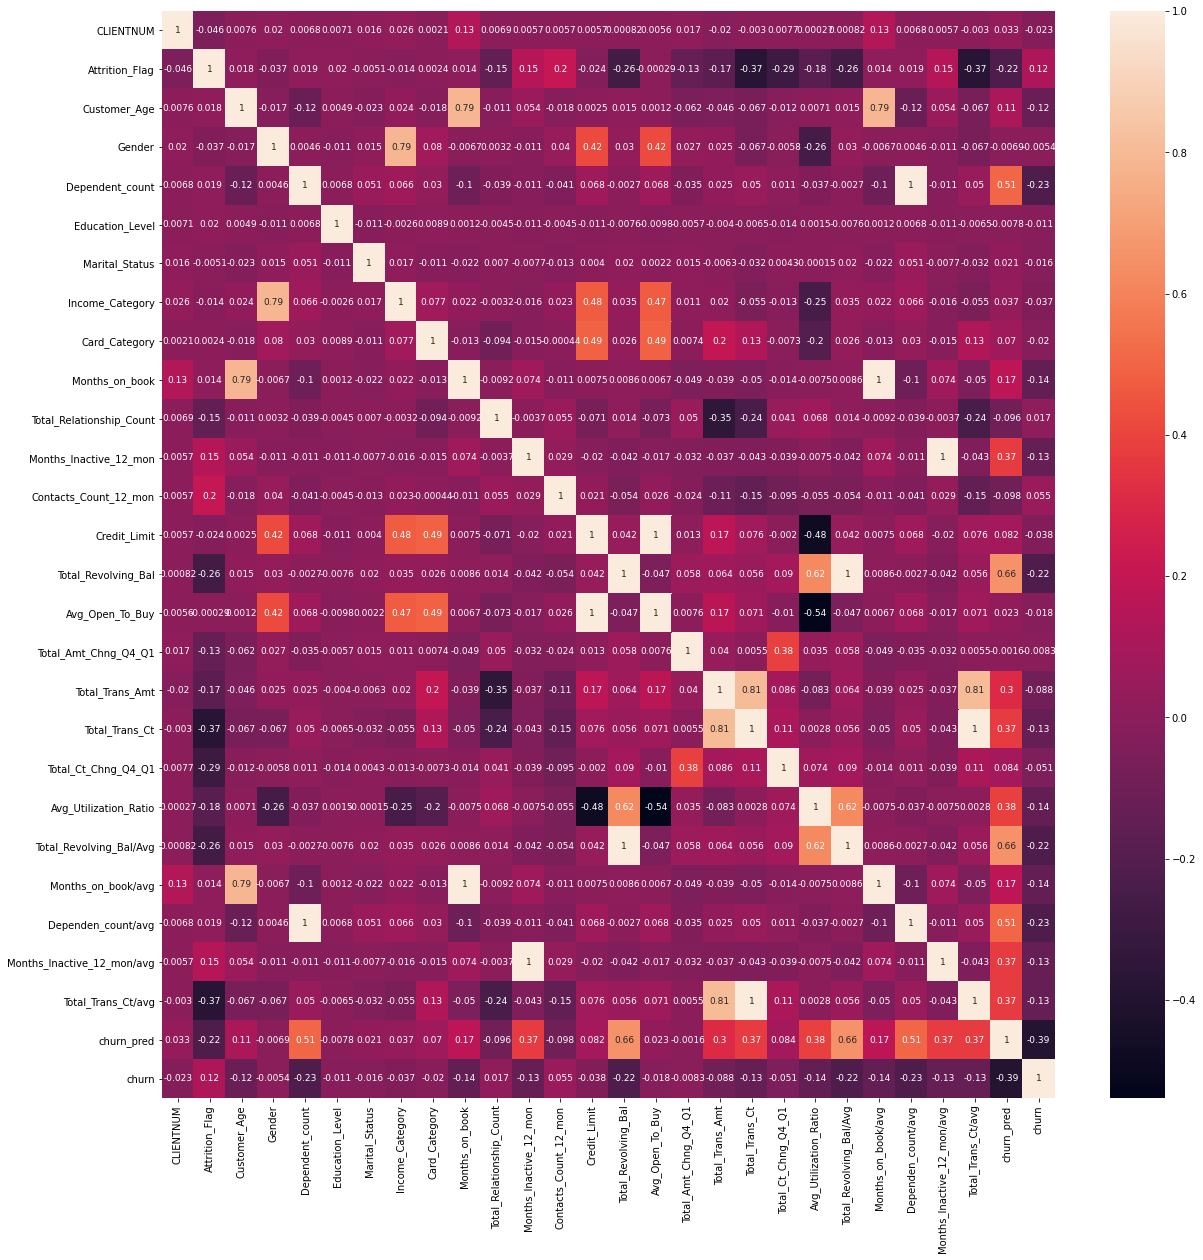

In [22]:
import seaborn as sns
churn_kor1 = churn.corr(method = "pearson")
sns.heatmap(churn_kor1, 
xticklabels = churn_kor1.columns.values, yticklabels = churn_kor1.columns.values, annot = True, annot_kws = {"size":9})
heat_map = plt.gcf()
heat_map.set_size_inches(20,20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

[]

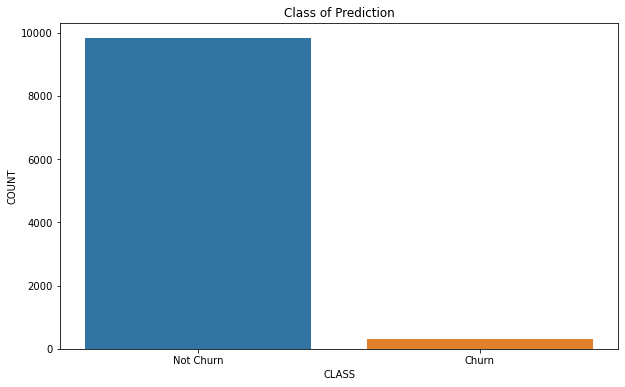

In [23]:
# show distributing churn 

data = list(churn["churn"].values)
ones = data.count(1)
zeros = data.count(0)
fig = plt.figure(figsize=(10,6))
sns.barplot(x=["Not Churn", "Churn"], y = [zeros, ones])
plt.title("Class of Prediction")
plt.xlabel("CLASS")
plt.ylabel("COUNT")
plt.plot()

In [24]:
over_sampler = SMOTE(sampling_strategy="minority")

#Load Independent as Predictor(X) dan Dependent as Target (Y) variable 
X = churn[["Gender", "Education_Level", 
           "Total_Revolving_Bal",  
            "Months_on_book", 
            "Dependent_count", 
            "Months_Inactive_12_mon", 
            "Customer_Age","Income_Category" , 
            "Total_Trans_Ct"]]
y = churn["churn"] 

X_oversampled, y_oversampled = over_sampler.fit_resample(X, y)
counter = 0
o_df = pd.DataFrame()
for i in list(X.columns):
    o_df[i] = X_oversampled[i]
    counter += 1
    
o_df["churn"] = y_oversampled
df = o_df.copy()
Counter(y_oversampled)

Counter({0: 9822, 1: 9822})

#### Show Distribution other attributes 

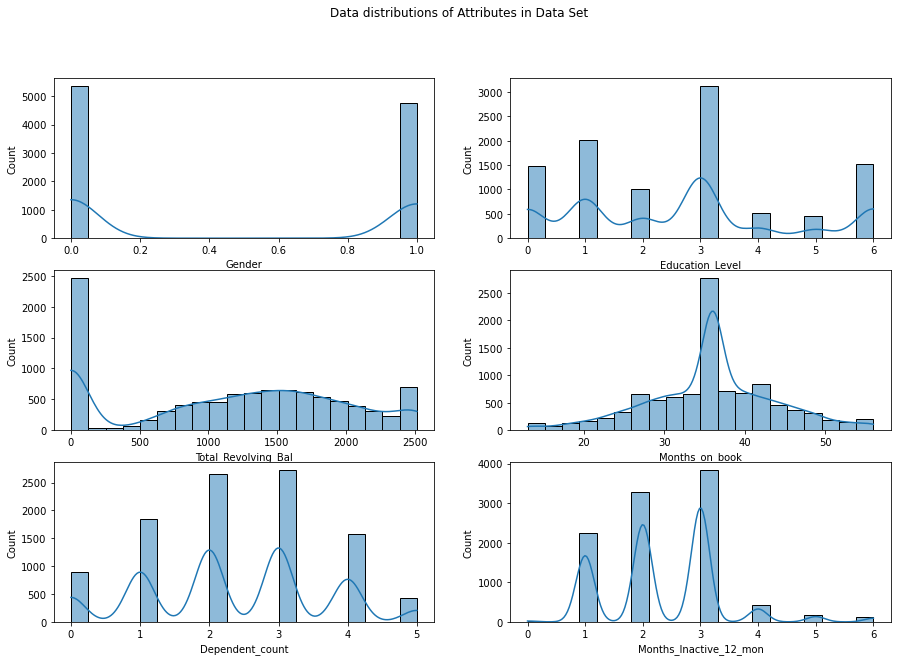

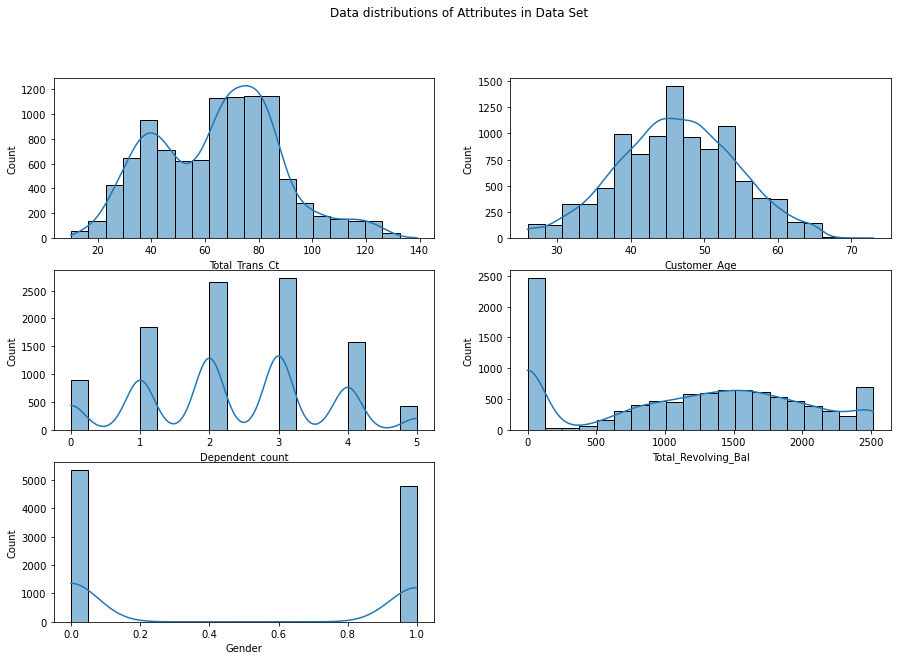

In [25]:
columns = list(X.columns)

def data_distribution(columns, bins = 20):
    fig = plt.figure(figsize=(15, 10))
    plt.suptitle("Data distributions of Attributes in Data Set")
    counter = 1
    for i in columns:
        plt.subplot(3,2, counter)
        sns.histplot(X[i], bins = bins, kde = True)
        counter += 1
        
data_distribution(columns [:6])
data_distribution(columns[::-2])

#### Non-Linear Tranformation 

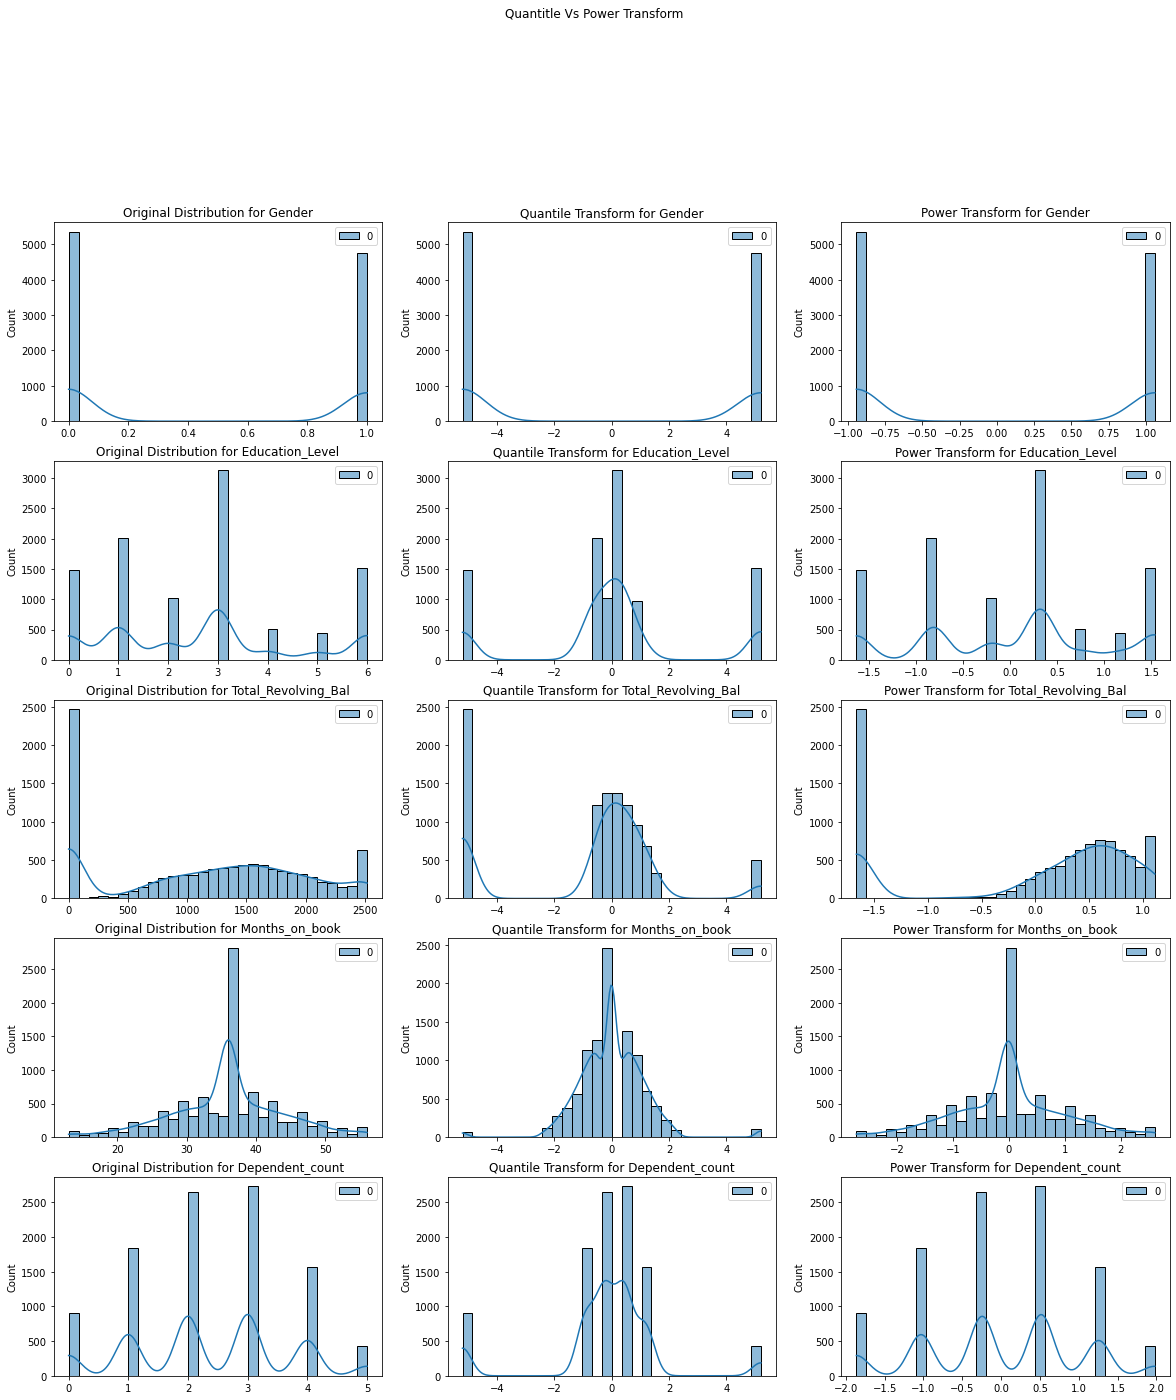

In [26]:
cols1 = ["Gender", "Education_Level", "Total_Revolving_Bal", "Months_on_book", "Dependent_count"]
cols2 = [ "Months_Inactive_12_mon", "Customer_Age", "Income_Category", "Total_Trans_Ct"]



def check_best_transformer(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(20,30))
    plt.suptitle("Quantitle Vs Power Transform")
    j = 1
    for i in columns:
        array = np.array(X[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(7,3,j)
        sns.histplot(array, bins = 30, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(7,3,j+1)
        sns.histplot(x, bins = 30, kde = True)
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(7,3,j+2)
        sns.histplot(y, bins = 30, kde = True)
        plt.title(f"Power Transform for {i}")
        j += 3

check_best_transformer(cols1)

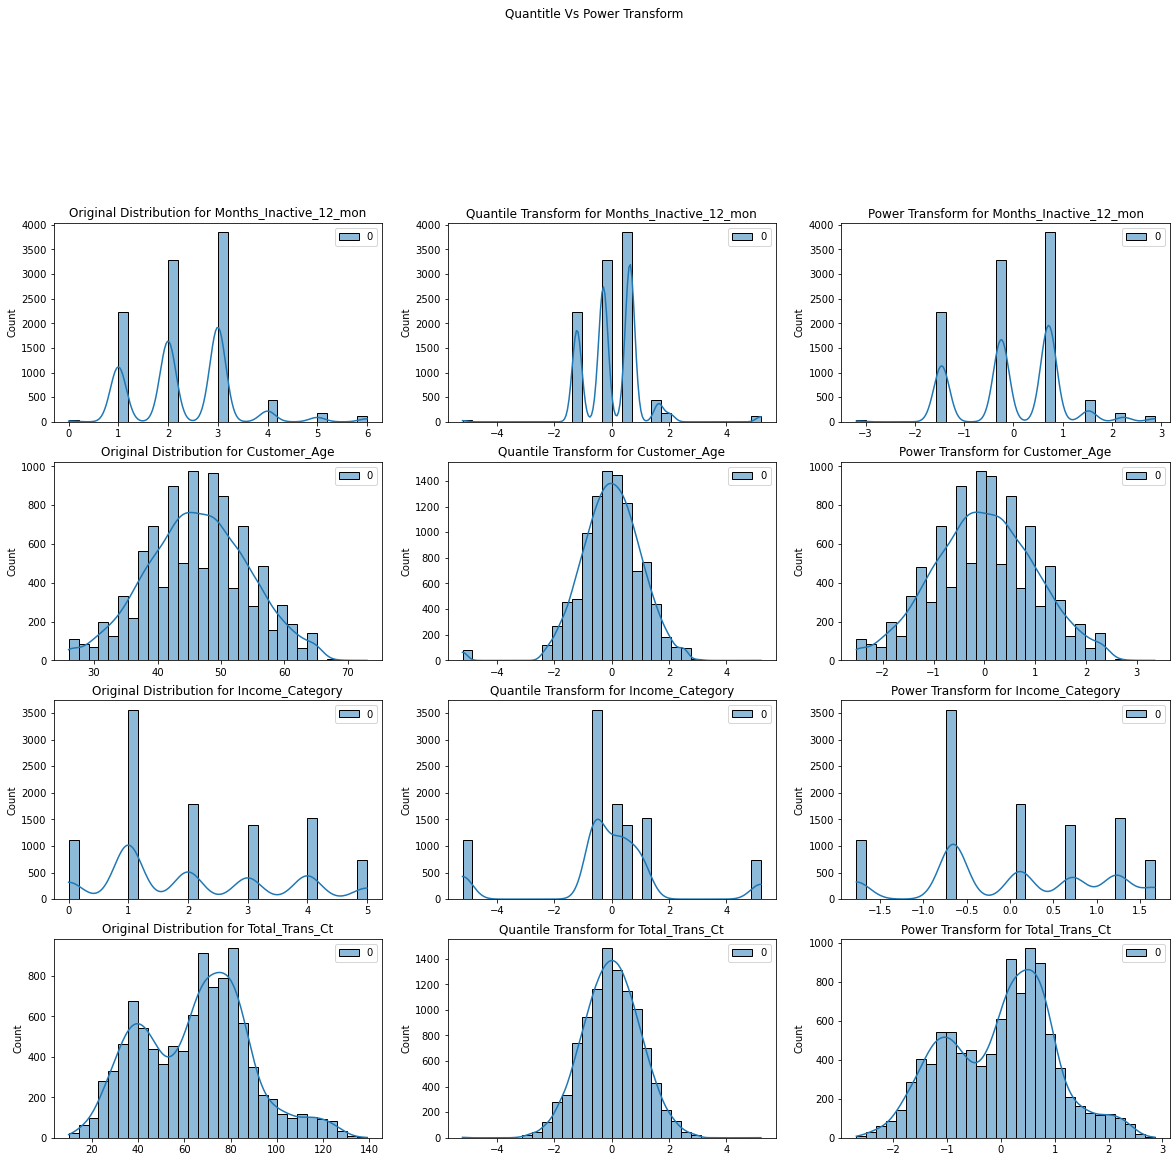

In [27]:
check_best_transformer(cols2)

In [28]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
cols = cols1 + cols2
for i in cols:
    X[i] = qt.fit_transform(np.array(X[i]).reshape(-1,1))
    print(f"{i} transformation Successful!")


Gender transformation Successful!
Education_Level transformation Successful!
Total_Revolving_Bal transformation Successful!
Months_on_book transformation Successful!
Dependent_count transformation Successful!
Months_Inactive_12_mon transformation Successful!
Customer_Age transformation Successful!
Income_Category transformation Successful!
Total_Trans_Ct transformation Successful!



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

#### Split the Data 

In [29]:
import sklearn.model_selection as ms 

X_train, X_test, y_train, y_test = ms.train_test_split(X,y, test_size = 0.2,
                                                       random_state = 125, stratify = y)


print('Proportional class distribution in train data:\n', y_train.value_counts() / y_train.count(), '\n')
print('Proportional class distribution in test data:\n', y_test.value_counts() / y_test.count())

Proportional class distribution in train data:
 0    0.96988
1    0.03012
Name: churn, dtype: float64 

Proportional class distribution in test data:
 0    0.969891
1    0.030109
Name: churn, dtype: float64


In [30]:
over_sampler = SMOTE(sampling_strategy="minority")
over_sampler.fit_resample(X_train, y_train)

(         Gender  Education_Level  Total_Revolving_Bal  Months_on_book  \
 0     -5.199338        -5.199338             0.485167       -0.007535   
 1      5.199338         0.253866             1.609037       -0.007535   
 2     -5.199338        -0.264255             5.199338       -1.236069   
 3     -5.199338         5.199338             5.199338        0.638657   
 4     -5.199338         0.253866             5.199338        1.683986   
 ...         ...              ...                  ...             ...   
 15709 -5.199338         5.199338            -5.199338       -1.803495   
 15710 -5.199338        -0.090556            -5.199338        0.811131   
 15711 -5.199338         0.616659            -5.199338       -2.013252   
 15712 -5.199338         0.253866             0.035862       -1.939609   
 15713  5.199338         0.742509            -1.955445        0.311469   
 
        Dependent_count  Months_Inactive_12_mon  Customer_Age  Income_Category  \
 0             0.432565     

#### Logistic Regression 

In [31]:
import sklearn.model_selection as ms 
import sklearn.linear_model as lm 
import sklearn.metrics as met 
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
model = lm.LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
print (model.coef_)

[[-0.01822211 -0.02064098 -1.1821118  -0.82815608 -1.00773647 -1.93137731
  -0.25022938  0.01613356 -1.73165979]]


In [33]:
y_prediksi = model.predict (X_test)
print (y_prediksi)
score = met.accuracy_score(y_test, y_prediksi)
print ("accuracy=", score)
precision = met.precision_score(y_test, y_prediksi)
print ("precision=", precision)
recall = met.recall_score(y_test, y_prediksi)
print ("recall=", recall)
auc = met.roc_auc_score(y_test, y_prediksi)
print ("AUC=", auc)


[0 0 0 ... 0 0 0]
accuracy= 0.9871668311944719
precision= 0.8723404255319149
recall= 0.6721311475409836
AUC= 0.8345388562132399


In [34]:
from sklearn.metrics import classification_report
# Predict
y_prediksi = model.predict(X_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_prediksi))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1965
           1       0.87      0.67      0.76        61

    accuracy                           0.99      2026
   macro avg       0.93      0.83      0.88      2026
weighted avg       0.99      0.99      0.99      2026



In [35]:
confusion = met.confusion_matrix(y_test, y_prediksi)
confusion 

array([[1959,    6],
       [  20,   41]], dtype=int64)

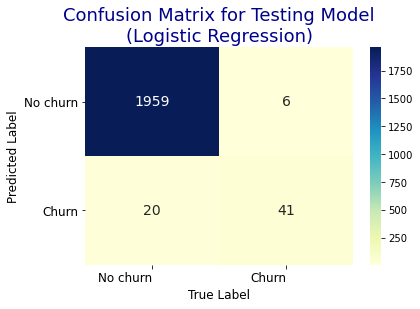

In [36]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('Predicted Label', fontsize=12)
plt.xlabel('True Label', fontsize=12)
plt.show()

#### Random Forest Classifier 

In [37]:
import sklearn.ensemble as ens 
import sklearn.metrics as met
model = ens.RandomForestClassifier (n_estimators = 200 ,
                                   random_state = 125)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=125)

In [38]:
y_prediksi = model.predict (X_test)
print (y_prediksi)
score = met.accuracy_score(y_test, y_prediksi)
print ("accuracy=", score)
precision = met.precision_score(y_test, y_prediksi)
print ("precision=", precision)
recall = met.recall_score(y_test, y_prediksi)
print ("recall=", recall)
auc = met.roc_auc_score(y_test, y_prediksi)
print ("AUC=", auc)


[0 0 0 ... 0 0 0]
accuracy= 0.9891411648568608
precision= 0.9534883720930233
recall= 0.6721311475409836
AUC= 0.8355566679180745


In [39]:
from sklearn.metrics import classification_report
# Predict
y_prediksi = model.predict(X_test)
# Print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_prediksi))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1965
           1       0.95      0.67      0.79        61

    accuracy                           0.99      2026
   macro avg       0.97      0.84      0.89      2026
weighted avg       0.99      0.99      0.99      2026



In [40]:
confusion = met.confusion_matrix(y_test, y_prediksi)
confusion 

array([[1963,    2],
       [  20,   41]], dtype=int64)

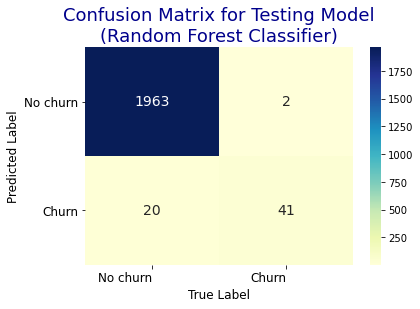

In [41]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(Random Forest Classifier)', fontsize=18, color='darkblue')
plt.ylabel('Predicted Label', fontsize=12)
plt.xlabel('True Label', fontsize=12)
plt.show()

#### Decision Tree 

In [42]:
import sklearn.tree as tree 
import sklearn.metrics as met
model = tree.DecisionTreeClassifier(random_state= 125, max_depth = 5, criterion = "entropy")
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=125)

In [43]:
y_prediksi = model.predict (X_test)
print (y_prediksi)
score = met.accuracy_score(y_test, y_prediksi)
print ("accuracy=", score)
precision = met.precision_score(y_test, y_prediksi)
print ("precision=", precision)
recall = met.recall_score(y_test, y_prediksi)
print ("recall=", recall)
auc = met.roc_auc_score(y_test, y_prediksi)
print ("AUC=", auc)

[0 0 0 ... 0 0 0]
accuracy= 0.981243830207305
precision= 0.7674418604651163
recall= 0.5409836065573771
AUC= 0.767947274016602


In [44]:
from sklearn.metrics import classification_report
# Predict
y_prediksi = model.predict(X_test)
# Print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_prediksi))

Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1965
           1       0.77      0.54      0.63        61

    accuracy                           0.98      2026
   macro avg       0.88      0.77      0.81      2026
weighted avg       0.98      0.98      0.98      2026



In [45]:
confusion = met.confusion_matrix(y_test, y_prediksi)
confusion 

array([[1955,   10],
       [  28,   33]], dtype=int64)

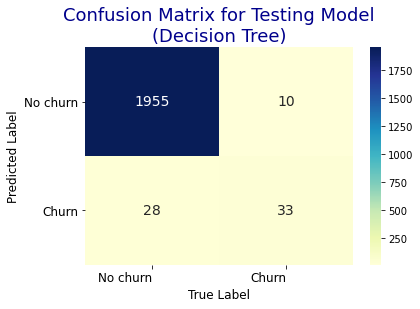

In [46]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree)', fontsize=18, color='darkblue')
plt.ylabel('Predicted Label', fontsize=12)
plt.xlabel('True Label', fontsize=12)
plt.show()

#### Gradient Boosting Classifier 

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
#Train the model
gbt_model = GradientBoostingClassifier().fit(X_train, y_train)
print(gbt_model)

GradientBoostingClassifier()


In [48]:
y_prediksi = gbt_model.predict (X_test)
print (y_prediksi)
score = met.accuracy_score(y_test, y_prediksi)
print ("accuracy=", score)
precision = met.precision_score(y_test, y_prediksi)
print ("precision=", precision)
recall = met.recall_score(y_test, y_prediksi)
print ("recall=", recall)
auc = met.roc_auc_score(y_test, y_prediksi)
print ("AUC=", auc)

[0 0 0 ... 0 0 0]
accuracy= 0.9906219151036525
precision= 0.9375
recall= 0.7377049180327869
AUC= 0.8680891002377676


In [49]:
from sklearn.metrics import classification_report
# Predict
y_prediksi = gbt_model.predict(X_test)
# Print classification report
print('Classification Report Testing Model (GDB Classifier):')
print(classification_report(y_test, y_prediksi))

Classification Report Testing Model (GDB Classifier):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1965
           1       0.94      0.74      0.83        61

    accuracy                           0.99      2026
   macro avg       0.96      0.87      0.91      2026
weighted avg       0.99      0.99      0.99      2026



In [50]:
confusion = met.confusion_matrix(y_test, y_prediksi)
confusion 

array([[1962,    3],
       [  16,   45]], dtype=int64)

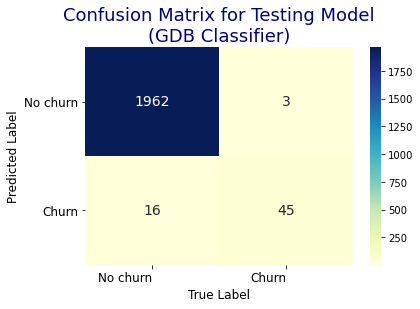

In [51]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(GDB Classifier)', fontsize=18, color='darkblue')
plt.ylabel('Predicted Label', fontsize=12)
plt.xlabel('True Label', fontsize=12)
plt.show()

#### XGBoost Classifier 

In [52]:
from xgboost import XGBClassifier

classifier = XGBClassifier(use_label_encoder=False, disable_default_eval_metric=1)

#Train the model
xgb_model = classifier.fit(X_train, y_train)
print(xgb_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              disable_default_eval_metric=1, enable_categorical=False, gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)


In [53]:
y_prediksi = xgb_model.predict (X_test)
print (y_prediksi)
score = met.accuracy_score(y_test, y_prediksi)
print ("accuracy=", score)
precision = met.precision_score(y_test, y_prediksi)
print ("precision=", precision)
recall = met.recall_score(y_test, y_prediksi)
print ("recall=", recall)
auc = met.roc_auc_score(y_test, y_prediksi)
print ("AUC=", auc)

[0 0 0 ... 0 0 0]
accuracy= 0.9921026653504442
precision= 0.9245283018867925
recall= 0.8032786885245902
AUC= 0.9006215325574605


In [54]:
from sklearn.metrics import classification_report
# Predict
y_prediksi = xgb_model.predict(X_test)
# Print classification report
print('Classification Report Testing Model (XGBoost):')
print(classification_report(y_test, y_prediksi))

Classification Report Testing Model (XGBoost):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1965
           1       0.92      0.80      0.86        61

    accuracy                           0.99      2026
   macro avg       0.96      0.90      0.93      2026
weighted avg       0.99      0.99      0.99      2026



In [55]:
confusion = met.confusion_matrix(y_test, y_prediksi)
confusion 

array([[1961,    4],
       [  12,   49]], dtype=int64)

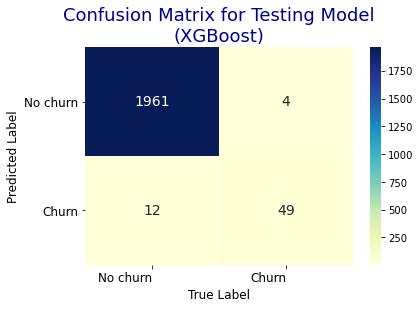

In [56]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(XGBoost)', fontsize=18, color='darkblue')
plt.ylabel('Predicted Label', fontsize=12)
plt.xlabel('True Label', fontsize=12)
plt.show()

* F2 Score 

* Fbeta = ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall)

* F2-Measure (beta=2.0): Less weight on precision, more weight on recall

In [57]:
Fbeta = ((1 + 2^2) * precision * recall) / ((2^2) * precision + recall)
print ("Nilai Fbeta Score: ", Fbeta)

Nilai Fbeta Score:  0.9245283018867925


#### Feature Importance 

In [58]:
import sklearn.feature_selection as fs 

rfe = fs.RFE(xgb_model)
rfe = rfe.fit(X_train, y_train)
print ("Support=", rfe.support_)
print ("Ranking=", rfe.ranking_)

Support= [False False  True False  True  True False False  True]
Ranking= [6 5 1 3 1 1 2 4 1]


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


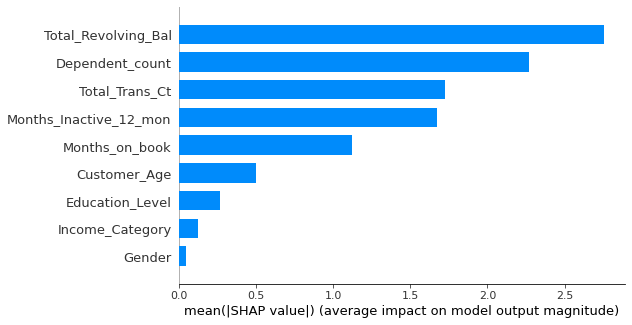

In [59]:
import shap
shap_values = shap.TreeExplainer(xgb_model).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

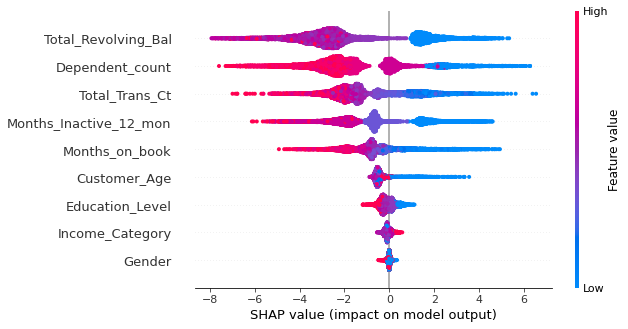

In [60]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X)


#### Best Model : XGBoost Classifier, Feature Importance: Total Revolving Bal, Dependent Count, Total Trans Ct, Months Inactive 12 mon

#### Finished 